# To understand the survival outcomes and identify the factors that contribute to mortality

Import several Python libraries that are commonly used for data analysis and visualization


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# The warnings library is used to suppress warning messages that may be generated during execution of the code.
import warnings
warnings.filterwarnings("ignore")

### Data Cleaning


Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in data. It is an important step in data analysis, as it helps ensure that the data is accurate, consistent, and reliable.

In [12]:
df_train=pd.read_csv("D:/ingzhen/OneDrive - Universiti Malaya/y1s2/WIA1006/ML Project/genometype/train.csv",encoding='utf-8')
df_test=pd.read_csv("D:/ingzhen\OneDrive - Universiti Malaya/y1s2/WIA1006/ML Project/genometype/test.csv",encoding='utf-8')

# display the first five rows on df_train
df_train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [13]:
# display the last five rows of df_train
df_train.tail()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [14]:
# output a list of the column names to the console
df_train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [15]:
#remove unrelated columns

df_train.drop("Patient Id",axis=1,inplace=True)
df_train.drop("Family Name",axis=1,inplace=True)
df_train.drop("Patient First Name",axis=1,inplace=True)
df_train.drop("Father's name",axis=1,inplace=True)
df_train.drop("Institute Name",axis=1,inplace=True)
df_train.drop("Location of Institute",axis=1,inplace=True)
df_train.drop("Place of birth",axis=1,inplace=True)

In [16]:
# isna() is to check for missing values (also known as "null" and "NaN" values)
# sum() is to count the number of missing values for each column in the data frame

# df_train.isna().sum() is to check for missing values in the 'df_train' data frame and returning a count of the number
# of missing values for each column

df_train.isna().sum()


Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
Parental consent                                    2125
Follow-up                      

In [17]:
# this code fills in the missing value (NaN) for each column in the 'df_train' Dataframe with the mode (most common value) of that column

df_train["Patient Age"].fillna(str(df_train["Patient Age"].mode().values[0]),inplace=True)
df_train["Inherited from father"].fillna(str(df_train["Inherited from father"].mode().values[0]),inplace=True)
df_train["Maternal gene"].fillna(str(df_train["Maternal gene"].mode().values[0]),inplace=True)
df_train["Mother's age"].fillna(str(df_train["Mother's age"].mode().values[0]),inplace=True)
df_train["Father's age"].fillna(str(df_train["Father's age"].mode().values[0]),inplace=True)
df_train["Respiratory Rate (breaths/min)"].fillna(str(df_train["Respiratory Rate (breaths/min)"].mode().values[0]),inplace=True)
df_train["Heart Rate (rates/min"].fillna(str(df_train["Heart Rate (rates/min"].mode().values[0]),inplace=True)
df_train["Test 1"].fillna(str(df_train["Test 1"].mode().values[0]),inplace=True)
df_train["Test 2"].fillna(str(df_train["Test 2"].mode().values[0]),inplace=True)
df_train["Test 3"].fillna(str(df_train["Test 3"].mode().values[0]),inplace=True)
df_train["Test 4"].fillna(str(df_train["Test 4"].mode().values[0]),inplace=True)
df_train["Test 5"].fillna(str(df_train["Test 5"].mode().values[0]),inplace=True)
df_train["Parental consent"].fillna(str(df_train["Parental consent"].mode().values[0]),inplace=True)
df_train["Follow-up"].fillna(str(df_train["Follow-up"].mode().values[0]),inplace=True)
df_train["Gender"].fillna(str(df_train["Gender"].mode().values[0]),inplace=True)
df_train["Birth asphyxia"].fillna(str(df_train["Birth asphyxia"].mode().values[0]),inplace=True)
df_train["Autopsy shows birth defect (if applicable)"].fillna(str(df_train["Autopsy shows birth defect (if applicable)"].mode().values[0]),inplace=True)
df_train["Folic acid details (peri-conceptional)"].fillna(str(df_train["Folic acid details (peri-conceptional)"].mode().values[0]),inplace=True)
df_train["H/O serious maternal illness"].fillna(str(df_train["H/O serious maternal illness"].mode().values[0]),inplace=True)
df_train["H/O radiation exposure (x-ray)"].fillna(str(df_train["H/O radiation exposure (x-ray)"].mode().values[0]),inplace=True)
df_train["H/O substance abuse"].fillna(str(df_train["H/O substance abuse"].mode().values[0]),inplace=True)
df_train["Assisted conception IVF/ART"].fillna(str(df_train["Assisted conception IVF/ART"].mode().values[0]),inplace=True)
df_train["History of anomalies in previous pregnancies"].fillna(str(df_train["History of anomalies in previous pregnancies"].mode().values[0]),inplace=True)
df_train["No. of previous abortion"].fillna(str(df_train["No. of previous abortion"].mode().values[0]),inplace=True)
df_train["Birth defects"].fillna(str(df_train["Birth defects"].mode().values[0]),inplace=True)
df_train["White Blood cell count (thousand per microliter)"].fillna(str(df_train["White Blood cell count (thousand per microliter)"].mode().values[0]),inplace=True)
df_train["Blood test result"].fillna(str(df_train["Blood test result"].mode().values[0]),inplace=True)
df_train["Symptom 1"].fillna(str(df_train["Symptom 1"].mode().values[0]),inplace=True)
df_train["Symptom 2"].fillna(str(df_train["Symptom 2"].mode().values[0]),inplace=True)
df_train["Symptom 3"].fillna(str(df_train["Symptom 3"].mode().values[0]),inplace=True)
df_train["Symptom 4"].fillna(str(df_train["Symptom 4"].mode().values[0]),inplace=True)
df_train["Symptom 5"].fillna(str(df_train["Symptom 5"].mode().values[0]),inplace=True)
df_train["Genetic Disorder"].fillna(str(df_train["Genetic Disorder"].mode().values[0]),inplace=True)
df_train["Disorder Subclass"].fillna(str(df_train["Disorder Subclass"].mode().values[0]),inplace=True)

In [18]:
# isna() is to check for missing values (also known as "null" and "NaN" values)
# sum() is to count the number of missing values for each column in the data frame

# df_train.isna().sum() is to check for missing values in the 'df_train' data frame and returning a count of the number
# of missing values for each column

df_train.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Parental consent                                    0
Follow-up                                           0
Gender                      

In [19]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             22083 non-null  object 
 3   Maternal gene                                     22083 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [21]:
for column in df_train:

    # Within the loop, the columnSeriesObj variable is assigned the current column, 
    # which is a Pandas Series object. 
    # The values attribute of the Series object returns a NumPy array containing the values in the column.
    columnSeriesObj = df_train[column]
    
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)
    print("---------------------------------------------")

Column Name :  Patient Age
Column Contents :  [2.0 4.0 6.0 ... 8.0 7.0 11.0]
---------------------------------------------
Column Name :  Genes in mother's side
Column Contents :  ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
---------------------------------------------
Column Name :  Inherited from father
Column Contents :  ['No' 'Yes' 'No' ... 'No' 'No' 'No']
---------------------------------------------
Column Name :  Maternal gene
Column Contents :  ['Yes' 'No' 'No' ... 'Yes' 'Yes' 'No']
---------------------------------------------
Column Name :  Paternal gene
Column Contents :  ['No' 'No' 'No' ... 'No' 'Yes' 'No']
---------------------------------------------
Column Name :  Blood cell count (mcL)
Column Contents :  [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
---------------------------------------------
Column Name :  Mother's age
Column Contents :  ['23.0' '23.0' 41.0 ... 35.0 19.0 32.0]
---------------------------------------------
Column Name :  Father

In [22]:
# This code creates a list of columns to encode, and then loops through each column, 
# applying a lambda function to convert "Yes" to 1 and "No" to 0. 
# The result is that the original columns are replaced with new binary columns.

df_train["Genes in mother's side"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Genes in mother's side"]]
df_train["Inherited from father"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Inherited from father"]]
df_train["Maternal gene"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Maternal gene"]]
df_train["Paternal gene"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Paternal gene"]]
df_train["Parental consent"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Parental consent"]]
df_train["Birth asphyxia"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Birth asphyxia"]]
df_train["Folic acid details (peri-conceptional)"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Folic acid details (peri-conceptional)"]]
df_train["H/O radiation exposure (x-ray)"]=[1 if i.strip()== "Yes" else 0 for i in df_train["H/O radiation exposure (x-ray)"]]
df_train["H/O substance abuse"]=[1 if i.strip()== "Yes" else 0 for i in df_train["H/O substance abuse"]]
df_train["Assisted conception IVF/ART"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Assisted conception IVF/ART"]]
df_train["History of anomalies in previous pregnancies"]=[1 if i.strip()== "Yes" else 0 for i in df_train["History of anomalies in previous pregnancies"]]
df_train["H/O serious maternal illness"]=[1 if i.strip()=="Yes" else 0 for i in df_train["H/O serious maternal illness"]]

In [23]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,1,1,0,0,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,1,0,0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,1,0,1,0,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,1,0,1,1,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [24]:
for column in df_train:
    columnSeriesObj = df_train[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)
    print("---------------------------------------------")

Column Name :  Patient Age
Column Contents :  [2.0 4.0 6.0 ... 8.0 7.0 11.0]
---------------------------------------------
Column Name :  Genes in mother's side
Column Contents :  [1 1 1 ... 1 1 1]
---------------------------------------------
Column Name :  Inherited from father
Column Contents :  [0 1 0 ... 0 0 0]
---------------------------------------------
Column Name :  Maternal gene
Column Contents :  [1 0 0 ... 1 1 0]
---------------------------------------------
Column Name :  Paternal gene
Column Contents :  [0 0 0 ... 0 1 0]
---------------------------------------------
Column Name :  Blood cell count (mcL)
Column Contents :  [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
---------------------------------------------
Column Name :  Mother's age
Column Contents :  ['23.0' '23.0' 41.0 ... 35.0 19.0 32.0]
---------------------------------------------
Column Name :  Father's age
Column Contents :  ['20.0' 23.0 22.0 ... 51.0 '20.0' 62.0]
-----------------


This code is used to print the unique values in each column of the DataFrame df_train. The unique() method is called on each column of df_train and the resulting array of unique values is printed to the console along with the name of the column.

In [25]:
print("Status: ",df_train["Status"].unique())
print("Respiratory Rate (breaths/min): ",df_train["Respiratory Rate (breaths/min)"].unique())
print("Heart Rate (rates/min: ",df_train["Heart Rate (rates/min"].unique())
print("Follow-up: ",df_train["Follow-up"].unique())
print("Gender: ",df_train["Gender"].unique())
print("Autopsy shows birth defect (if applicable): ",df_train["Autopsy shows birth defect (if applicable)"].unique())
print("Birth defects: ",df_train["Birth defects"].unique())
print("Blood test result: ",df_train["Blood test result"].unique())
print("Genetic Disorder: ",df_train["Genetic Disorder"].unique())
print("Disorder Subclass: ",df_train["Disorder Subclass"].unique())


Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min:  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect (if applicable):  ['Not applicable' 'No findings' 'No' 'Yes']
Birth defects:  ['Singular' 'Multiple']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


In [26]:
#Alive':1 'Deceased:0'
df_train["Status"]=[1 if i.strip()== "Alive" else 0 for i in df_train["Status"]]
#Normal (30-60):1' 'Tachypnea:0
df_train["Respiratory Rate (breaths/min)"]=[1 if i.strip()== "Normal (30-60)" else 0 for i in df_train["Respiratory Rate (breaths/min)"]]
#Normal:1' 'Tachycardia:0
df_train["Heart Rate (rates/min"]=[1 if i.strip()== "Normal" else 0 for i in df_train["Heart Rate (rates/min"]]
#High:1, Low:0
df_train["Follow-up"]=[1 if i.strip()== "High" else 0 for i in df_train["Follow-up"]]
#['Singular' 'Multiple']
df_train["Birth defects"]=[1 if i.strip()== "Singular" else 0 for i in df_train["Birth defects"]]

In [27]:
#1: male 0: female 2: ambiguous    
df_train["Gender"]=[1 if i.strip()== "Male" else 0 if i.strip() == "Female" else 2 for i in df_train["Gender"]]

In [28]:
df_train.Gender.unique()

array([2, 1, 0], dtype=int64)

In [29]:
#Not applicable:3' 'None:2' 'No:0' 'Yes:1'
df_train["Autopsy shows birth defect (if applicable)"]=[1 if i.strip()== "Yes" else 0 if i.strip() == "No" else 2 if i.strip()=="No findings" 
                                                        else 3 for i in df_train["Autopsy shows birth defect (if applicable)"]]

In [30]:
df_train["Autopsy shows birth defect (if applicable)"].unique()

array([3, 2, 0, 1], dtype=int64)

In [31]:
#'slightly abnormal':1, 'normal':0, 'inconclusive':2 'abnormal:3']
df_train["Blood test result"]=[1 if i.strip()== "slightly abnormal" else 0 if i.strip() == "normal" else 2 if i.strip()=="inconclusive" else 3 for i in df_train["Blood test result"]]

In [32]:
df_train["Blood test result"].unique()

array([1, 0, 2, 3], dtype=int64)

In [33]:
#'Mitochondrial genetic inheritance disorders':1,'Multifactorial genetic inheritance disorders':0'Single-gene inheritance diseases:2'
df_train["Genetic Disorder"]=[1 if i.strip()== "Mitochondrial genetic inheritance disorders" else 0 if i.strip() == "Multifactorial genetic inheritance disorders" else 2 for i in df_train["Genetic Disorder"]]

In [34]:
df_train["Genetic Disorder"].unique()

array([1, 0, 2], dtype=int64)

In [35]:
#Leber's hereditary optic neuropathy:1 
#Cystic fibrosis:0
#Diabetes:2
#Leigh syndrome:3
#Cancer:4
#Tay-Sachs:5
#Hemochromatosis:6
#Mitochondrial myopathy:7
#Alzheimer's:8
df_train["Disorder Subclass"]=[1 if i.strip()== "Leber's hereditary optic neuropathy" 
                                else 0 if i.strip() == "Cystic fibrosis" 
                               else 2 if i.strip()=="Diabetes" 
                               else 3 if i.strip()=="Leigh syndrome"
                               else 4 if i.strip()=="Cancer"
                               else 5 if i.strip()=="Tay-Sachs"
                               else 6 if i.strip()=="Hemochromatosis"
                               else 7 if i.strip()=="Mitochondrial myopathy"
                               else 8 for i in df_train["Disorder Subclass"]]

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  int64  
 2   Inherited from father                             22083 non-null  int64  
 3   Maternal gene                                     22083 non-null  int64  
 4   Paternal gene                                     22083 non-null  int64  
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  int64  
 9   Respiratory Rate 

Downcast the data types of all the columns in the DataFrame df_train to the smallest possible numeric data type that can represent the values in each column

It's important to note that downcasting the data types may result in loss of precision or range for some columns, so it should be used with caution and careful consideration of the data being processed.

In [37]:
df_train = df_train.apply(pd.to_numeric,downcast="float")

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Genes in mother's side                            22083 non-null  float32
 2   Inherited from father                             22083 non-null  float32
 3   Maternal gene                                     22083 non-null  float32
 4   Paternal gene                                     22083 non-null  float32
 5   Blood cell count (mcL)                            22083 non-null  float32
 6   Mother's age                                      22083 non-null  float32
 7   Father's age                                      22083 non-null  float32
 8   Status                                            22083 non-null  float32
 9   Respiratory Rate 

In [39]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,23.0,20.0,1.0,1.0,...,1.0,9.857562,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,23.0,23.0,0.0,0.0,...,0.0,5.522560,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,1.0,1.0,...,1.0,3.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,20.0,0.0,0.0,...,1.0,7.919321,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.0,20.0,1.0,0.0,...,0.0,4.098210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Creates a new column in the DataFrame.

The purpose of this code may be to create a new feature in the DataFrame that could potentially be useful in a machine learning model.

For example, the average age of parents could be a relevant factor in determining the likelihood of certain genetic disorders or birth defects.

In [40]:
df_train["sum of Mother's and fathers age avg"]=(df_train["Mother's age"]+df_train["Father's age"]) / 2

In [41]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg
0,2.0,1.0,0.0,1.0,0.0,4.760603,23.0,20.0,1.0,1.0,...,9.857562,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.5
1,4.0,1.0,1.0,0.0,0.0,4.910669,23.0,23.0,0.0,0.0,...,5.522560,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,23.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,1.0,1.0,...,3.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,31.5
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,20.0,0.0,0.0,...,7.919321,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,20.5
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.0,20.0,1.0,0.0,...,4.098210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26.0


In [42]:
#total symptom
df_train["total symptom"]=(df_train["Symptom 1"]+df_train["Symptom 2"]+df_train["Symptom 3"]+df_train["Symptom 4"]+df_train["Symptom 5"]) / 5

In [43]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg,total symptom
0,2.0,1.0,0.0,1.0,0.0,4.760603,23.0,20.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.5,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,23.0,23.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,23.0,0.8
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,31.5,0.8
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,20.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,20.5,0.2
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.0,20.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26.0,0.0


In [44]:
# It can help in gaining insights into the distribution and spread of data, 
# identifying potential outliers, and detecting possible issues like missing or incorrect values.

df_train.describe()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg,total symptom
count,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,...,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000
mean,6.781959,0.595164,0.391432,0.609383,0.433591,4.898871,31.375900,36.016708,0.501879,0.553095,...,1.444052,0.632251,0.596975,0.580356,0.450120,0.416882,1.253272,3.667980,33.696304,0.535317
std,4.241088,0.490871,0.488082,0.487900,0.495581,0.199663,9.845254,14.807540,0.500008,0.497184,...,1.067584,0.482203,0.490517,0.493512,0.497517,0.493054,0.613765,2.364828,9.129560,0.224115
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.092727,18.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,4.763108,23.000000,20.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,26.000000,0.400000
50%,6.000000,1.000000,0.000000,1.000000,0.000000,4.899399,28.000000,33.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,33.500000,0.600000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,5.033830,40.000000,49.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,40.500000,0.600000
max,14.000000,1.000000,1.000000,1.000000,1.000000,5.609829,51.000000,64.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,57.500000,1.000000



df_train.corr() **computes pairwise correlation of columns**, excluding NA/null values. The resulting correlation matrix provides information about the strength and direction of the linear relationship between the variables in the dataset. The values range from -1 to 1, where a value of 1 represents a perfect positive correlation, -1 represents a perfect negative correlation, and 0 represents no correlation.

It is a useful tool for identifying the relationships between variables in the dataset, which can help in **feature selection** and identifying the most important variables for the model. It can also provide insights into multicollinearity, which occurs when two or more variables are highly correlated with each other, indicating that they may be measuring the same thing. In such cases, it is usually better to remove one of the variables to avoid redundancy in the model.

In [47]:
df_train.corr()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg,total symptom
Patient Age,1.000000,0.003452,-0.008275,0.001492,-0.004422,0.010155,0.008203,-0.000949,0.007764,-0.011186,...,0.004462,0.000006,0.007062,-0.019291,-0.006475,-0.010584,0.005872,0.003171,0.003653,-0.012933
Genes in mother's side,0.003452,1.000000,0.008960,0.089605,-0.007389,-0.002403,0.010247,0.000520,-0.000221,-0.001917,...,0.009318,-0.000321,0.001120,0.006801,0.011139,0.013832,-0.068655,-0.135966,0.005947,0.014380
Inherited from father,-0.008275,0.008960,1.000000,0.009222,0.095115,-0.007677,0.006349,0.003769,-0.012293,0.011765,...,0.008831,-0.004460,-0.001561,0.008348,0.006371,0.020789,-0.067767,-0.125198,0.006480,0.013050
Maternal gene,0.001492,0.089605,0.009222,1.000000,0.011829,0.008119,-0.004247,-0.022747,0.003566,-0.003921,...,0.004294,0.009778,0.008800,0.015639,0.006853,0.011676,-0.056601,-0.121280,-0.020737,0.023127
Paternal gene,-0.004422,-0.007389,0.095115,0.011829,1.000000,-0.003494,-0.001070,0.000636,0.013799,0.000572,...,0.010374,0.010270,0.000180,-0.002390,0.011039,0.006553,-0.049738,-0.114605,-0.000061,0.011230
Blood cell count (mcL),0.010155,-0.002403,-0.007677,0.008119,-0.003494,1.000000,-0.001129,-0.003498,0.003149,0.002200,...,-0.004756,0.002585,-0.005347,0.003888,0.004455,0.002684,0.004781,-0.009202,-0.003446,0.003643
Mother's age,0.008203,0.010247,0.006349,-0.004247,-0.001070,-0.001129,1.000000,0.059002,-0.001519,-0.008097,...,-0.003693,-0.020455,-0.021779,-0.003388,0.010563,0.024325,0.008263,-0.002519,0.587045,-0.004435
Father's age,-0.000949,0.000520,0.003769,-0.022747,0.000636,-0.003498,0.059002,1.000000,-0.000087,-0.030954,...,0.008176,-0.018103,-0.026051,-0.007673,0.016978,0.031040,0.009774,0.006047,0.842781,-0.001377
Status,0.007764,-0.000221,-0.012293,0.003566,0.013799,0.003149,-0.001519,-0.000087,1.000000,0.008206,...,-0.001479,0.010473,0.001242,0.006958,0.003699,0.001598,0.003983,-0.013107,-0.000889,0.010460
Respiratory Rate (breaths/min),-0.011186,-0.001917,0.011765,-0.003921,0.000572,0.002200,-0.008097,-0.030954,0.008206,1.000000,...,-0.000738,0.013919,-0.002498,-0.002670,-0.004351,0.001701,-0.010160,0.004364,-0.029468,0.002536


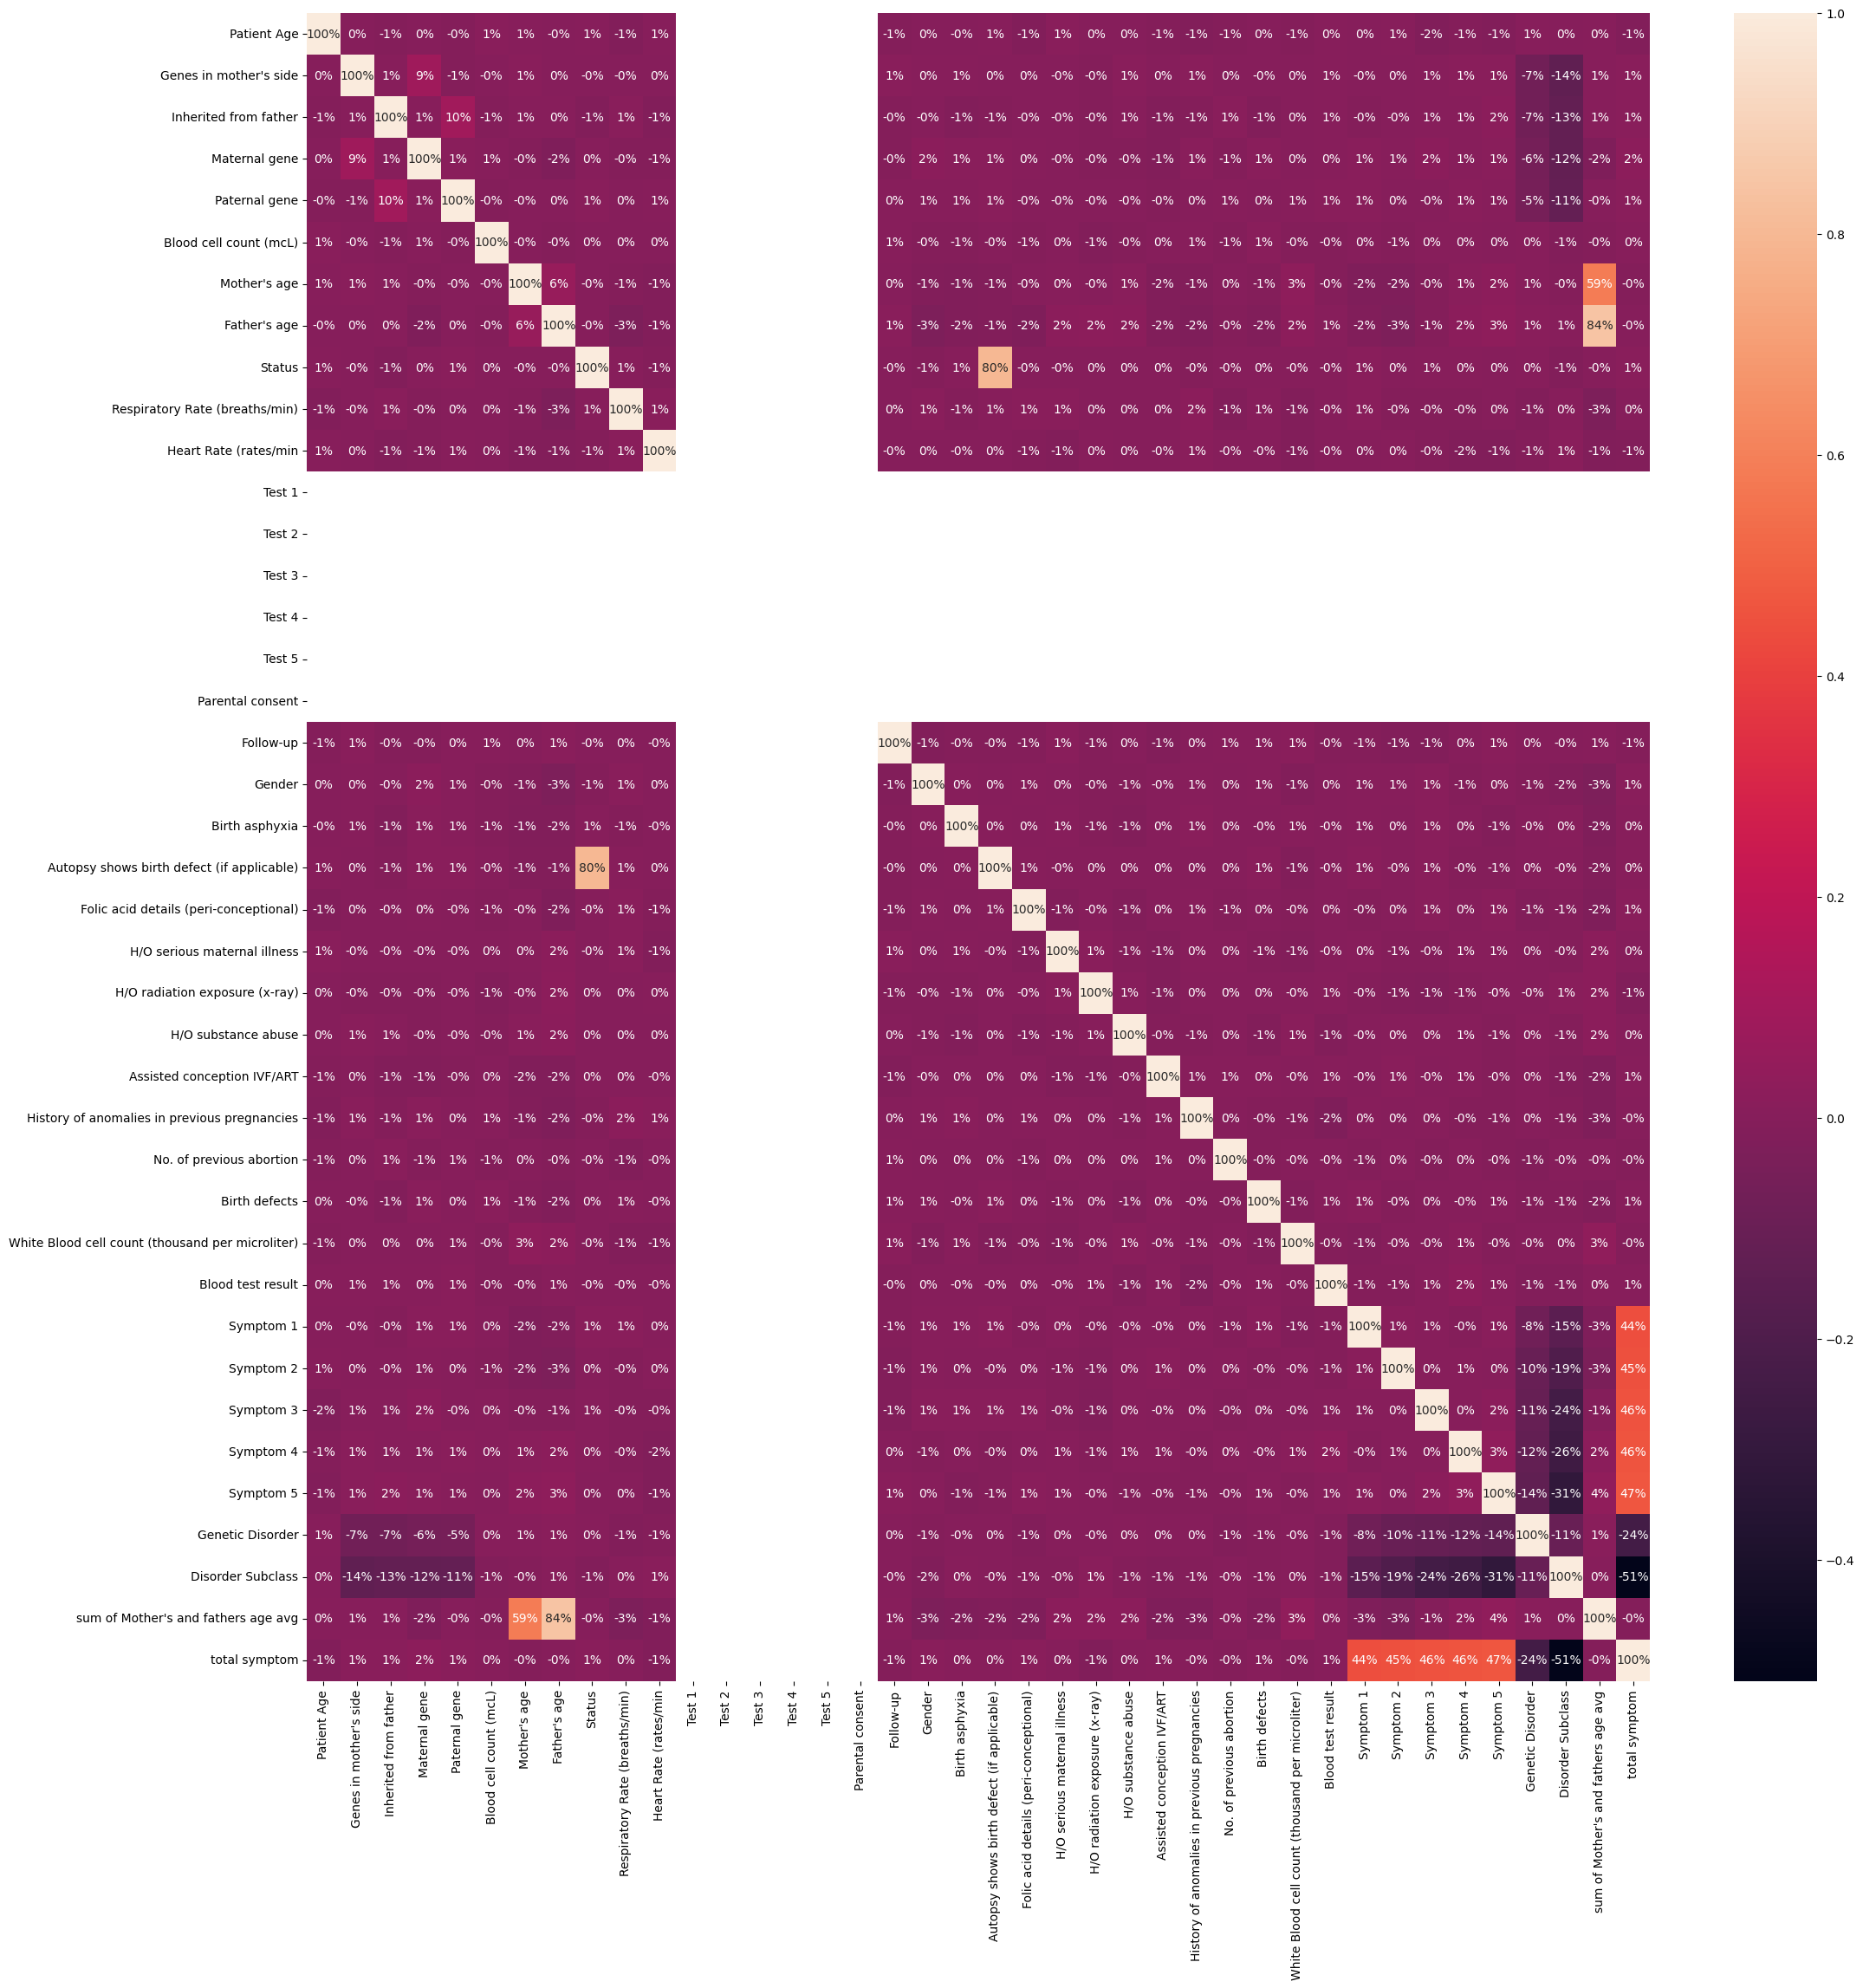

In [70]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.iloc[:,0:40].corr(),annot=True,fmt=".0%")
plt.show()

# Data Visualization (Status)


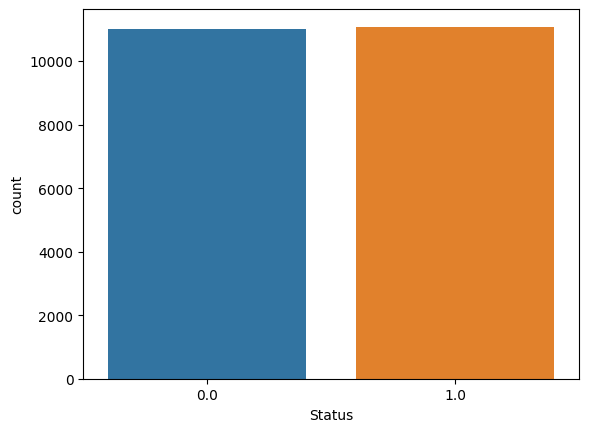

In [71]:
df_train['Status'] = pd.Categorical(df_train['Status'])

sns.countplot(x='Status',data = df_train)
plt.show()

In [46]:
df_train.Status.value_counts()

Status
1.0    11083
0.0    11000
Name: count, dtype: int64

# Data Training (Status)

Training your data means using a portion of your data to build a model that can learn and make predictions based on the patterns it has learned. The purpose of training is to teach the model to make accurate predictions on new, unseen data.

In [49]:
# This code is used to split the input features and the target variable from the dataframe df_train.

# df_train.loc[:, df_train.columns != 'Status'] selects all columns in df_train except for the column 'Status'. 
# The resulting dataframe X contains all the input features.

# df_train.loc[:, 'Status'] selects only the 'Status' column from df_train, which is assigned to the variable y. 
# This variable contains the target variable that we are trying to predict.

X,y = df_train.loc[:,df_train.columns != 'Status'], df_train.loc[:,'Status']

In [50]:
# split X and y into training and testing sets
# X train = independent feature
# Y train = target variable
# X test = independent feature
# Y test = target variable

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
# This code prints the shape or dimensionality of the training and testing feature sets
# the output will be in the format (number of rows, number of columns)
X_train.shape, X_test.shape

((17666, 39), (4417, 39))

In [52]:
# check the shape of Y_train and Y_test

Y_train.shape, Y_test.shape

((17666,), (4417,))

# Standardization
which is performed by the StandardScaler in this code, is a common preprocessing step in machine learning. It scales the data to have a mean of 0 and a standard deviation of 1. This is done to ensure that all features have the same scale, and that features with large values do not dominate the model training process over features with small values.

By scaling the data, we can ensure that the model weights are updated more uniformly across all features, leading to better convergence during model training. Additionally, it can improve the performance of certain models, such as those based on distance calculations, by reducing the impact of large numerical values.

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [54]:
# Splitting the data allows us to train the model on a portion of the data and test it on another portion to evaluate its performance. 
# This helps to ensure that the model is not overfitting the data and can generalize well to unseen data.

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

# Model Training
Helps to train an SVM classifier on a dataset, make predictions on the test data, and evaluate the performance of the model by calculating the accuracy score.

In [55]:
# import the SVM algorithm from scikit-learn library
from sklearn.svm import SVC


# import the accuracy metric to evaluate the performance of the model
from sklearn.metrics import accuracy_score


# instantiate the SVM classifier with default hyperparameters.
svc=SVC() 


# fit the classifier on the training data X_train and corresponding target values Y_train.
svc.fit(X_train,Y_train)


# predict the target values on the test data X_test
y_pred=svc.predict(X_test)


# compute and print the accuracy score of the model using the predicted target values y_pred and the actual target values Y_test.
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9493


In [56]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9540


In [57]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, Y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9540


# Data Visualization (Disorder Subclass)

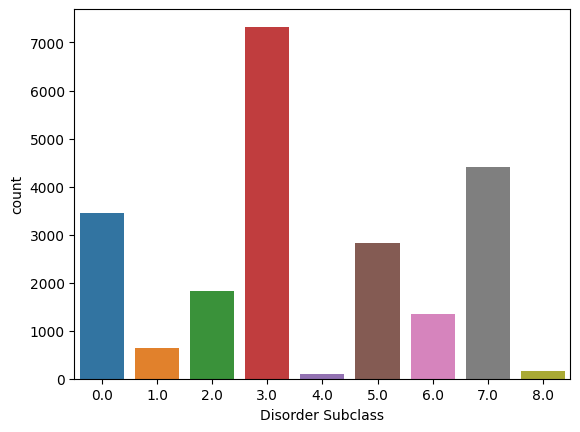

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

df_train['Disorder Subclass'] = pd.Categorical(df_train['Disorder Subclass'])

sns.countplot(x='Disorder Subclass', data=df_train)
plt.show()



In [69]:
df_train['Disorder Subclass'].value_counts()


Disorder Subclass
3.0    7328
7.0    4405
0.0    3448
5.0    2833
2.0    1817
6.0    1355
1.0     648
8.0     152
4.0      97
Name: count, dtype: int64

# Data Training (Disorder Subclass)

# Data Visualization

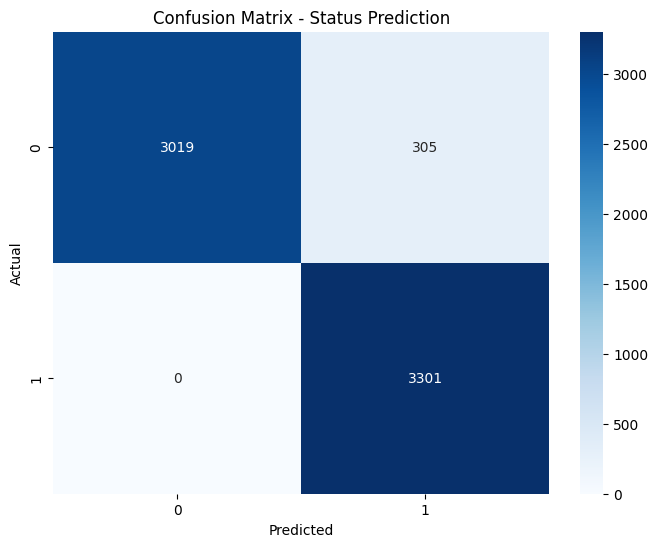

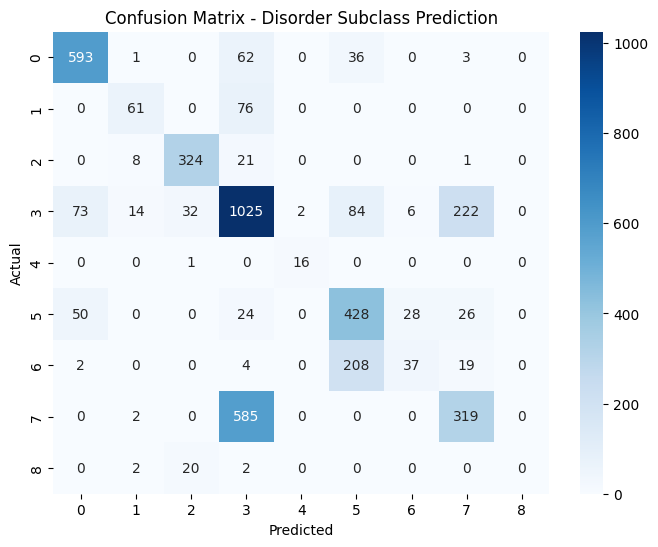

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix for status prediction
cm_status = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_status, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Status Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for disorder subclass prediction
cm_subclass = confusion_matrix(y_test_subclass, y_pred_subclass)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_subclass, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Disorder Subclass Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()